# Bibliotecas e Configurações

In [364]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [365]:
# Ignorar SettingWithCopyWarning
'''import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)'''

'import warnings\nfrom pandas.core.common import SettingWithCopyWarning\n\nwarnings.simplefilter(action="ignore", category=SettingWithCopyWarning)'

# Importação dos Dados

In [366]:
df = pd.read_csv('NPS_Complete_UFF_2022-07-18_2022-12-31_pre-tratado_sem-transf-log.csv', sep=';')

df['USERVALUEQ1_LABEL'].value_counts()

display(df)

,ANF,CUSTOMER_SEGMENT,SURVEY,USERVALUEQ1_LABEL,USERVALUEQ2_VALUE,NPS_Class,vol_Rede_Social,vol_Video,vol_Comunicacao,vol_Loja_de_Apps,...,VoLTE_perc,term_fabr,device_tech,DISP_STATUS_p,ACD_STATUS_p,OCUP_STATUS_p,Qtd_CRM,dias_franquia_zerada,dias_traf_red,dias_consumo_bonus_ctrl
0,51,Pós-pago,Uso Dados,8,Não Informado,Passivo,3331.0,535.0,363.0,210.0,...,86.0,lg,4G,0.000000,0.000000,0.000000,0,0.0,0.0,0.000000e+00
1,11,Pré-pago,Uso Dados,9,Plano/Bonus,Promotor,1314.0,173.0,197.0,7.0,...,91.0,samsung,4G,0.164670,0.000000,0.056800,0,0.0,0.0,0.000000e+00
2,37,Pré-pago,Uso Dados,10,Velocidade,Promotor,3276.0,346.0,798.0,18.0,...,63.0,motorola,4G,0.799740,0.000000,1.327936,0,0.0,0.0,0.000000e+00
3,81,Pré-pago,Uso Dados,10,Outros,Promotor,134.0,321.0,4.0,0.0,...,0.0,outros,3G,0.387239,0.040754,0.000000,0,0.0,0.0,0.000000e+00
4,85,Pré-pago,Uso Dados,10,Sinal/Cobertura,Promotor,44.0,31.0,372.0,6.0,...,0.0,não informado,4G,0.227265,0.000000,0.000000,0,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45201,48,Controle,Uso Dados,0,Sinal/Cobertura,Detrator,193.0,221.0,46.0,160.0,...,0.0,xiaomi,4G,0.000000,0.000000,0.552183,0,0.0,0.0,0.000000e+00
45202,35,Controle,Uso Dados,7,Sinal/Cobertura,Passivo,2918.0,426.0,2336.0,50.0,...,0.0,samsung,4G,0.000000,0.000000,0.000000,0,0.0,0.0,2.258065e+16
45203,43,Controle,Uso Dados,10,Duracao pacote dados,Promotor,31.0,207.0,70.0,4.0,...,100.0,motorola,5G,0.226444,0.000000,0.000000,0,0.0,0.0,0.000000e+00
45204,42,Controle,Uso Dados,10,Sinal/Cobertura,Promotor,0.0,174.0,4.0,0.0,...,0.0,samsung,3G,0.000000,0.000000,0.000000,0,0.0,0.0,0.000000e+00


In [367]:
df.info() # Não serão feitos mais tratamentos nos dados, o pré-tratamento já foi suficiente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45206 entries, 0 to 45205
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ANF                      45206 non-null  int64  
 1   CUSTOMER_SEGMENT         45206 non-null  object 
 2   SURVEY                   45206 non-null  object 
 3   USERVALUEQ1_LABEL        45206 non-null  int64  
 4   USERVALUEQ2_VALUE        45206 non-null  object 
 5   NPS_Class                45206 non-null  object 
 6   vol_Rede_Social          45206 non-null  float64
 7   vol_Video                45206 non-null  float64
 8   vol_Comunicacao          45206 non-null  float64
 9   vol_Loja_de_Apps         45206 non-null  float64
 10  vol_Musica               45206 non-null  float64
 11  vol_Google               45206 non-null  float64
 12  vol_Navegacao            45206 non-null  float64
 13  vol_InternetBank         45206 non-null  float64
 14  vol_Transporte        

# Análise Inicial

### Percentual Geral das classes NPS

NPS_Class
Promotor    23515
Detrator    13335
Passivo      8356
Name: count, dtype: int64


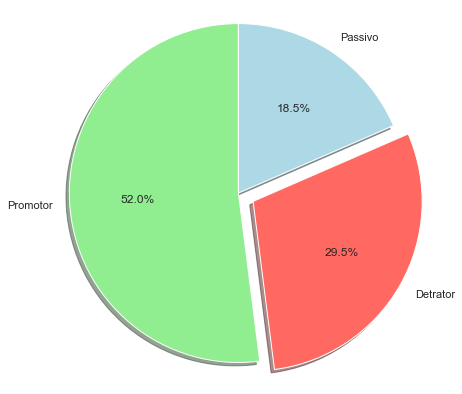

In [368]:
# Exibe valores inteiros
print(df["NPS_Class"].value_counts())

# Gráfico de Pizza

labels = df['NPS_Class'].value_counts().index
sizes = df["NPS_Class"].value_counts()
explode = [0, 0.1, 0]
cores = ['#90ee90', '#ff6961', '#add8e6']

fig1, ax1 = plt.subplots(figsize=(7, 7))

ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=cores)

ax1.axis('equal')

plt.show()

c:\Users\luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


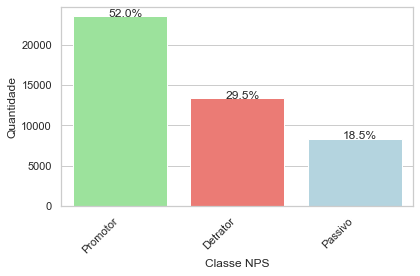

In [369]:
sns.set_theme(style="whitegrid")

ax = sns.countplot(x="NPS_Class", data=df, palette=cores, order=df['NPS_Class'].value_counts().index)
ax.set_xlabel('Classe NPS')
ax.set_ylabel('Quantidade')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# label com percentual
total = len(df['NPS_Class'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.tight_layout()
# plt.show() # zera a imagem, salva em branco

# Salvar em pdf
plt.savefig('plots/NPS_Class.pdf')


### Qual a maior queixa (respondida na segunda pergunta) entre os usuários 'Detratores'?

In [370]:
# Dataframes apenas com detratores e apenas com promotores
df_promotores = df[df['NPS_Class'] == 'Promotor']
df_detratores = df[df['NPS_Class'] == 'Detrator']

# Dicionário de dados 
count_pro = df_promotores['USERVALUEQ2_VALUE'].value_counts()
count_det = df_detratores['USERVALUEQ2_VALUE'].value_counts()

# Convertendo a série resultante em um dicionário 
dict_pro = count_pro.to_dict()
dict_det = count_det.to_dict()

# Obtendo a lista ordenada de chaves comuns a ambos os dicionários
chaves_ordenadas = list(dict_pro.keys())

# Reorganizando o dict_det na mesma ordem das chaves de dict_pro
dict_det_ordenado = {chave: dict_det[chave] for chave in chaves_ordenadas}

# Exibindo os dicionários originais e o dict_det ordenado
print("Dicionário Promotores:", dict_pro)
print("Dicionário Detratores (antes):", dict_det)
print("Dicionário Detratores (depois):", dict_det_ordenado)

Dicionário Promotores: {'Sinal/Cobertura': 5271, 'Não Informado': 3986, 'Velocidade': 2808, 'Plano/Bonus': 2718, 'Duracao pacote dados': 2359, 'Estabilidade': 2068, 'Outros': 2062, 'Qualidade das ligações': 793, 'Qualidade da Internet': 617, 'Planos e ofertas': 530, 'Atendimento': 199, 'Recarga/Conta': 104}
Dicionário Detratores (antes): {'Sinal/Cobertura': 3801, 'Não Informado': 1721, 'Velocidade': 1585, 'Duracao pacote dados': 1441, 'Plano/Bonus': 1249, 'Estabilidade': 1239, 'Outros': 1237, 'Qualidade da Internet': 303, 'Planos e ofertas': 299, 'Qualidade das ligações': 236, 'Atendimento': 119, 'Recarga/Conta': 105}
Dicionário Detratores (depois): {'Sinal/Cobertura': 3801, 'Não Informado': 1721, 'Velocidade': 1585, 'Plano/Bonus': 1249, 'Duracao pacote dados': 1441, 'Estabilidade': 1239, 'Outros': 1237, 'Qualidade das ligações': 236, 'Qualidade da Internet': 303, 'Planos e ofertas': 299, 'Atendimento': 119, 'Recarga/Conta': 105}


In [371]:
#list(dict_pro.values())
qtdx = list(dict_pro.keys())

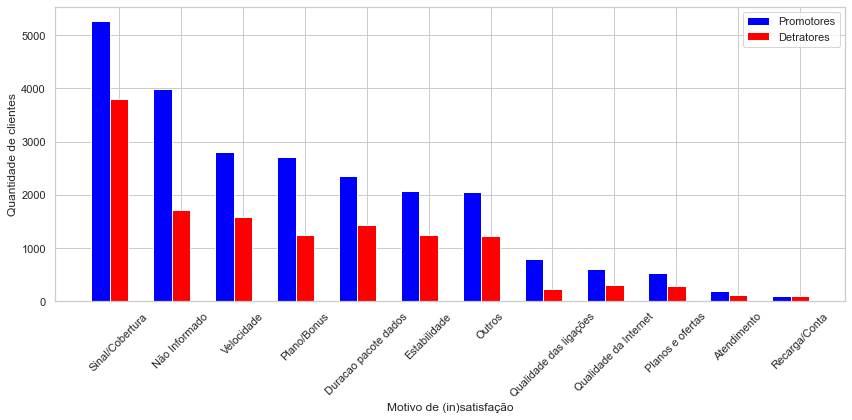

In [372]:
# Ajusta tamanho da figura
plt.figure(figsize=(12,6))

x = np.arange(len(qtdx))  # Use np.arange para criar uma sequência de posições x

y1 = list(dict_pro.values())
y2 = list(dict_det_ordenado.values())

width = 0.3
plt.bar(x - 0.3, y1, width, color='blue')
plt.bar(x, y2, width, color='red')

plt.xticks(x, list(dict_pro.keys()), rotation=45)
plt.xlabel("Motivo de (in)satisfação")
plt.ylabel("Quantidade de clientes")

# Cria legenda e exibe gráfico
plt.legend(["Promotores", "Detratores"])
#plt.show()

# salvar em pdf sem cortar a escrita
plt.tight_layout()
plt.savefig('plots/USERVALUEQ2_VALUE_duplo.pdf')


c:\Users\luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


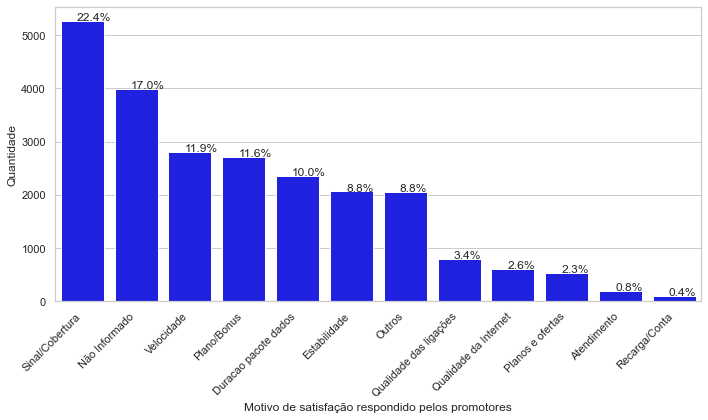

In [373]:
# grafico de barras 
sns.set_theme(style="whitegrid")

ax = sns.countplot(x="USERVALUEQ2_VALUE", data=df_promotores, order=df_promotores['USERVALUEQ2_VALUE'].value_counts().index, color='blue')
ax.set_xlabel('Motivo de satisfação respondido pelos promotores')
ax.set_ylabel('Quantidade')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# ajustar tamanho da figura
fig = plt.gcf()
fig.set_size_inches(10, 6)

# label com percentual
total = len(df_promotores['USERVALUEQ2_VALUE'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

# salvar em pdf sem cortar a escrita
plt.tight_layout()
plt.savefig('plots/USERVALUEQ2_VALUE_Promotores.pdf')

# NPS

### Por Estado

In [374]:
# Criando um novo Data Frame com as colunas de interesse
df_target = df[['ANF', 'NPS_Class']]

# Agrupando os DDDs por estado
DDD_UF = {
    61:"DF", 62:"GO", 64:"GO", 65:"MT", 66:"MT", 67:"MS", 82:"AL", 71:"BA", 73:"BA", 74:"BA", 75:"BA", 77:"BA",
    85:"CE", 88:"CE", 98:"MA", 99:"MA", 83:"PB", 81:"PE", 87:"PE", 86:"PI", 89:"PI", 84:"RN", 79:"SE", 68:"AC",
    96:"AP", 92:"AM", 97:"AM", 91:"PA", 93:"PA", 94:"PA", 69:"RO", 95:"RR", 63:"TO", 27:"ES", 28:"ES", 31:"MG", 
    32:"MG", 33:"MG", 34:"MG", 35:"MG", 37:"MG", 38:"MG", 21:"RJ", 22:"RJ", 24:"RJ", 11:"SP", 12:"SP", 13:"SP", 
    14:"SP", 15:"SP", 16:"SP", 17:"SP", 18:"SP", 19:"SP", 41:"PR", 42:"PR", 43:"PR", 44:"PR", 45:"PR", 46:"PR", 
    51:"RS", 52:"RS", 53:"RS", 54:"RS", 55:"RS", 47:"SC", 48:"SC", 49:"SC"
}
df_target = df_target.assign(ANF = df_target["ANF"].map(DDD_UF))

# renomear coluna ANF para UF
df_target.rename(columns={'ANF': 'UF'}, inplace=True)

# Quantidade de Clientes por Estado
print(df_target['UF'].value_counts())

UF
SP    11966
RJ     6882
PR     4394
MG     4234
SC     2432
BA     2226
PE     1861
RS     1449
CE     1417
DF     1219
PA     1195
GO      925
RN      667
PB      612
AL      581
AM      579
MA      510
PI      409
MS      373
MT      344
ES      220
SE      190
AP      149
RR      126
RO      107
TO       98
AC       41
Name: count, dtype: int64


In [375]:
# Cálculo do NPS por Estado
nps_state = df_target.groupby('UF')['NPS_Class'].value_counts(normalize=True).unstack()
nps_state['NPS'] = nps_state['Promotor'] - nps_state['Detrator']
nps_state = nps_state.sort_values(by='NPS', ascending=False)

display(nps_state)

NPS_Class,Detrator,Passivo,Promotor,NPS
UF,,,,
AM,0.202073,0.174439,0.623489,0.421416
MS,0.233244,0.182306,0.584450,0.351206
MA,0.245098,0.168627,0.586275,0.341176
PB,0.245098,0.173203,0.581699,0.336601
PA,0.241841,0.183264,0.574895,0.333054
CE,0.239238,0.191249,0.569513,0.330275
AP,0.268456,0.134228,0.597315,0.328859
RN,0.242879,0.187406,0.569715,0.326837
PI,0.234719,0.210269,0.555012,0.320293


In [376]:
df_nps = nps_state[['NPS']]
df_nps['UF'] = df_nps.index

# tirar o index
df_nps.reset_index(drop=True, inplace=True)

display(df_nps)

C:\Users\luiza\AppData\Local\Temp\ipykernel_6636\1666562585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nps['UF'] = df_nps.index


NPS_Class,NPS,UF
0,0.421416,AM
1,0.351206,MS
2,0.341176,MA
3,0.336601,PB
4,0.333054,PA
5,0.330275,CE
6,0.328859,AP
7,0.326837,RN
8,0.320293,PI
9,0.285714,RR


### Por Região Político-Administrativa

In [377]:
# Agrupando as UF por Região
UF_REG = {
  'AM': 'Norte', 'AP': 'Norte', 'AC': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte', 
  'MA': 'Nordeste', 'PI': 'Nordeste', 'CE': 'Nordeste', 'RN': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste', 'AL': 'Nordeste', 'SE': 'Nordeste', 'BA': 'Nordeste', 
  'MG': 'Sudeste', 'ES': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
  'PR': 'Sul', 'SC': 'Sul', 'RS': 'Sul',
  'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste' 
}

df_target = df_target.assign(UF = df_target["UF"].map(UF_REG))

# display(df_target)

# Quantidade de Clientes por Região
print(df_target['UF'].value_counts())

UF
Sudeste         23302
Nordeste         8473
Sul              8275
Centro-Oeste     2861
Norte            2295
Name: count, dtype: int64


In [378]:
# Cálculo do NPS por Região
nps_region = df_target.groupby('UF')['NPS_Class'].value_counts(normalize=True).unstack()
nps_region['NPS'] = nps_region['Promotor'] - nps_region['Detrator']
nps_region = nps_region.sort_values(by='NPS', ascending=False)

display(nps_region)

NPS_Class,Detrator,Passivo,Promotor,NPS
UF,,,,
Norte,0.250545,0.171678,0.577778,0.327233
Nordeste,0.256108,0.192848,0.551044,0.294937
Sudeste,0.301777,0.181444,0.516780,0.215003
Sul,0.318792,0.188882,0.492326,0.173535
Centro-Oeste,0.321566,0.187697,0.490738,0.169172


HIPÓTESE:
- Um maior IDH está intimamente relacionado com um menor NPS.

### Por Estilo/Segmento de Contrato

In [379]:
# Data Frame com as colunas de interesse
df_target = df[['CUSTOMER_SEGMENT', 'NPS_Class']]

# Quantidade de Clientes por Segmento
print(df['CUSTOMER_SEGMENT'].value_counts()) # bastante equilibrado

CUSTOMER_SEGMENT
Pré-pago    15752
Pós-pago    14863
Controle    14591
Name: count, dtype: int64


In [380]:
# Cálculo do NPS por Segmento
nps_segment = df_target.groupby('CUSTOMER_SEGMENT')['NPS_Class'].value_counts(normalize=True).unstack()
nps_segment['NPS'] = nps_segment['Promotor'] - nps_segment['Detrator']
nps_segment = nps_segment.sort_values(by='NPS', ascending=False)

# adiconar coluna que mostra o percentual de clientes por categoria
nps_segment['Percentual'] = df['CUSTOMER_SEGMENT'].value_counts(normalize=True)

display(nps_segment)

NPS_Class,Detrator,Passivo,Promotor,NPS,Percentual
CUSTOMER_SEGMENT,,,,,
Pré-pago,0.257682,0.155472,0.586846,0.329165,0.348449
Pós-pago,0.302429,0.207966,0.489605,0.187176,0.328784
Controle,0.327668,0.192996,0.479337,0.151669,0.322767


PERGUNTA: Que problemas podem estar vindo a ocorrer com os planos 'Pós-Pago' e 'Controle'?

In [381]:
'''
1. Pós-pago: Nos planos pós-pagos, os clientes pagam uma taxa mensal fixa com base em um pacote de serviços contratado. Os problemas comuns enfrentados pelos clientes pós-pagos podem incluir:
- Cobranças excessivas: Pode haver situações em que os clientes são cobrados incorretamente por serviços não utilizados ou por taxas adicionais não mencionadas claramente no contrato. (LADO DA EMPRESA)
- Uso excessivo: Se um cliente ultrapassar os limites do pacote contratado, podem ocorrer cobranças adicionais significativas. (LADO DO CLIENTE)

2. Controle: Os planos de controle geralmente combinam características dos planos pré-pagos e pós-pagos. Os problemas comuns enfrentados pelos clientes de planos de controle podem incluir:
- Limites de uso: Os clientes podem ter limites de minutos, mensagens de texto ou dados estabelecidos em seu pacote de controle. Se esses limites forem excedidos, o cliente pode enfrentar restrições ou cobranças adicionais. (LADO DO CLIENTE)
- Comunicação de uso: Alguns planos de controle podem não oferecer atualizações em tempo real sobre o uso atual, o que pode tornar difícil para o cliente controlar seu consumo. (LADO DA EMPRESA)
'''

'\n1. Pós-pago: Nos planos pós-pagos, os clientes pagam uma taxa mensal fixa com base em um pacote de serviços contratado. Os problemas comuns enfrentados pelos clientes pós-pagos podem incluir:\n- Cobranças excessivas: Pode haver situações em que os clientes são cobrados incorretamente por serviços não utilizados ou por taxas adicionais não mencionadas claramente no contrato. (LADO DA EMPRESA)\n- Uso excessivo: Se um cliente ultrapassar os limites do pacote contratado, podem ocorrer cobranças adicionais significativas. (LADO DO CLIENTE)\n\n2. Controle: Os planos de controle geralmente combinam características dos planos pré-pagos e pós-pagos. Os problemas comuns enfrentados pelos clientes de planos de controle podem incluir:\n- Limites de uso: Os clientes podem ter limites de minutos, mensagens de texto ou dados estabelecidos em seu pacote de controle. Se esses limites forem excedidos, o cliente pode enfrentar restrições ou cobranças adicionais. (LADO DO CLIENTE)\n- Comunicação de uso

In [382]:
# gerar csv com nps_segment
nps_segment *= 100
nps_segment = nps_segment.round(decimals=2)
nps_segment.to_csv('tables/nps_segment.csv', sep=',') 

### Por Volume de Dados gasto nas Redes Sociais

In [383]:
# Data Frame com as colunas de interesse
df_target = df[['vol_Rede_Social', 'NPS_Class']]

# Como está a distribuição de clientes por volume de uso de rede social? 
#sns.displot(df_target, x="vol_Rede_Social", kind="kde", height=5, aspect=1);

In [384]:
# Dar um zoom no plot acima na região de 0 a 8000 com step de 250
#sns.displot(df_target, x="vol_Rede_Social", kind="kde", height=5, aspect=3).set(xlim=(0, 8000), xticks=np.arange(0, 8000+1, 250));

In [385]:
# Classificando o volume gasto == MARK MANSON "a maioria absoluta da humanidade é, no máximo, medíocre em quase tudo"
for index, row in df_target.iterrows():
    if row['vol_Rede_Social'] <= 200.0: # até 200 MB 
        df_target.loc[index, 'vol_Rede_Social'] = 'Baixo Consumo'
    elif row['vol_Rede_Social'] > 200.0 and row['vol_Rede_Social'] <= 1800.0: # entre 200 MB e 1.8 GB 
        df_target.loc[index, 'vol_Rede_Social'] = 'Médio Consumo'
    elif row['vol_Rede_Social'] > 1800.0 and row['vol_Rede_Social'] <= 4000.0: # entre 1.8 GB e 4 GB
        df_target.loc[index, 'vol_Rede_Social'] = 'Alto Consumo'
    else:
        df_target.loc[index, 'vol_Rede_Social'] = 'Extremo Consumo'

# Quantidade de Clientes por Consumo de Rede Social
print(df_target['vol_Rede_Social'].value_counts())

C:\Users\luiza\AppData\Local\Temp\ipykernel_6636\1777383113.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Alto Consumo' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_target.loc[index, 'vol_Rede_Social'] = 'Alto Consumo'


vol_Rede_Social
Médio Consumo      16156
Baixo Consumo      15294
Extremo Consumo     7492
Alto Consumo        6264
Name: count, dtype: int64


In [386]:
# NPS por Consumo de Rede Social
nps_vol_redes_soc = df_target.groupby('vol_Rede_Social')['NPS_Class'].value_counts(normalize=True).unstack()
nps_vol_redes_soc['NPS'] = nps_vol_redes_soc['Promotor'] - nps_vol_redes_soc['Detrator']
nps_vol_redes_soc = nps_vol_redes_soc.sort_values(by='NPS', ascending=False)

# adiconar coluna que mostra o percentual de clientes por categoria
nps_vol_redes_soc['Percentual'] = df_target['vol_Rede_Social'].value_counts(normalize=True)

display(nps_vol_redes_soc)

NPS_Class,Detrator,Passivo,Promotor,NPS,Percentual
vol_Rede_Social,,,,,
Baixo Consumo,0.268994,0.190925,0.540081,0.271087,0.338318
Médio Consumo,0.296237,0.184142,0.519621,0.223385,0.357386
Alto Consumo,0.311782,0.185185,0.503033,0.191252,0.138566
Extremo Consumo,0.331287,0.173652,0.495061,0.163775,0.165730


In [387]:
# gerar csv com nps_vol_redes_soc
nps_vol_redes_soc *= 100
nps_vol_redes_soc = nps_vol_redes_soc.round(decimals=2)
nps_vol_redes_soc.to_csv('tables/nps_vol_redes_soc.csv', sep=',')

HIPÓTESES:
- Quanto maior o uso, ou a dependência do uso (no caso de pessoas que trabalham com rede social) maiores as exigências.
- Imediatismo atrelado ao vício em redes sociais (qualquer perda de sinal tira o viciado em rede social do sério).

### Por volume de dados gasto em navegação

In [388]:
# Data Frame com as colunas de interesse
df_target = df[['vol_Navegacao', 'NPS_Class']]

In [389]:
for index, row in df_target.iterrows():
    if row['vol_Navegacao'] <= 5.0: 
        df_target.loc[index, 'vol_Navegacao'] = 'Baixo Consumo'
    elif row['vol_Navegacao'] > 5.0 and row['vol_Navegacao'] <= 15.0:
        df_target.loc[index, 'vol_Navegacao'] = 'Médio Consumo'
    elif row['vol_Navegacao'] > 15.0 and row['vol_Navegacao'] <= 30.0: 
        df_target.loc[index, 'vol_Navegacao'] = 'Alto Consumo'
    else:
        df_target.loc[index, 'vol_Navegacao'] = 'Extremo Consumo'

# Quantidade de Clientes por Consumo de Navegacao
print(df_target['vol_Navegacao'].value_counts())

C:\Users\luiza\AppData\Local\Temp\ipykernel_6636\3132652905.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Alto Consumo' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_target.loc[index, 'vol_Navegacao'] = 'Alto Consumo'


vol_Navegacao
Baixo Consumo      35641
Médio Consumo       4027
Extremo Consumo     3345
Alto Consumo        2193
Name: count, dtype: int64


In [390]:
# NPS por Consumo de Navegacao
nps_vol_navegacao = df_target.groupby('vol_Navegacao')['NPS_Class'].value_counts(normalize=True).unstack()
nps_vol_navegacao['NPS'] = nps_vol_navegacao['Promotor'] - nps_vol_navegacao['Detrator']
nps_vol_navegacao = nps_vol_navegacao.sort_values(by='NPS', ascending=False)

# adiconar coluna que mostra o percentual de clientes por categoria
nps_vol_navegacao['Percentual'] = df_target['vol_Navegacao'].value_counts(normalize=True)

display(nps_vol_navegacao)

NPS_Class,Detrator,Passivo,Promotor,NPS,Percentual
vol_Navegacao,,,,,
Baixo Consumo,0.277910,0.181224,0.540866,0.262956,0.788413
Médio Consumo,0.343928,0.199404,0.456667,0.112739,0.089081
Alto Consumo,0.350205,0.206566,0.443228,0.093023,0.048511
Extremo Consumo,0.381764,0.191629,0.426607,0.044843,0.073995


In [391]:
# gerar csv com nps_vol_navegacao
nps_vol_navegacao *= 100
nps_vol_navegacao = nps_vol_navegacao.round(decimals=2)
nps_vol_navegacao.to_csv('tables/nps_vol_navegacao.csv', sep=',')

### Por volume de dados gasto em música

In [392]:
# Data Frame com as colunas de interesse
df_target = df[['vol_Musica', 'NPS_Class']]

In [393]:
for index, row in df_target.iterrows():
    if row['vol_Musica'] <= 5.0: 
        df_target.loc[index, 'vol_Musica'] = 'Baixo Consumo'
    elif row['vol_Musica'] > 5.0 and row['vol_Musica'] <= 15.0:
        df_target.loc[index, 'vol_Musica'] = 'Médio Consumo'
    elif row['vol_Musica'] > 15.0 and row['vol_Musica'] <= 30.0: 
        df_target.loc[index, 'vol_Musica'] = 'Alto Consumo'
    else:
        df_target.loc[index, 'vol_Musica'] = 'Extremo Consumo'

# Quantidade de Clientes por Consumo
print(df_target['vol_Musica'].value_counts())

C:\Users\luiza\AppData\Local\Temp\ipykernel_6636\3705078390.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Baixo Consumo' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_target.loc[index, 'vol_Musica'] = 'Baixo Consumo'


vol_Musica
Baixo Consumo      35639
Extremo Consumo     6854
Médio Consumo       1514
Alto Consumo        1199
Name: count, dtype: int64


In [394]:
# NPS por Consumo de Musica
nps_vol_musica = df_target.groupby('vol_Musica')['NPS_Class'].value_counts(normalize=True).unstack()
nps_vol_musica['NPS'] = nps_vol_musica['Promotor'] - nps_vol_musica['Detrator']
nps_vol_musica = nps_vol_musica.sort_values(by='NPS', ascending=False)

# adiconar coluna que mostra o percentual de clientes por categoria
nps_vol_musica['Percentual'] = df_target['vol_Musica'].value_counts(normalize=True)

display(nps_vol_musica)

NPS_Class,Detrator,Passivo,Promotor,NPS,Percentual
vol_Musica,,,,,
Baixo Consumo,0.281966,0.179831,0.538203,0.256236,0.788369
Alto Consumo,0.321101,0.211009,0.467890,0.146789,0.026523
Médio Consumo,0.326948,0.202114,0.470938,0.143989,0.033491
Extremo Consumo,0.351036,0.202509,0.446455,0.095419,0.151617


In [395]:
# gerar csv com nps_vol_navegacao
nps_vol_musica *= 100
nps_vol_musica = nps_vol_musica.round(decimals=2)
nps_vol_musica.to_csv('tables/nps_vol_musica.csv', sep=',')

### Por volume de dados gasto na loja de apps

In [396]:
# Data Frame com as colunas de interesse
df_target = df[['vol_MarketPlace', 'NPS_Class']]

In [397]:
for index, row in df_target.iterrows():
    if row['vol_MarketPlace'] <= 5.0: 
        df_target.loc[index, 'vol_MarketPlace'] = 'Baixo Consumo'
    elif row['vol_MarketPlace'] > 5.0 and row['vol_MarketPlace'] <= 15.0:
        df_target.loc[index, 'vol_MarketPlace'] = 'Médio Consumo'
    elif row['vol_MarketPlace'] > 15.0 and row['vol_MarketPlace'] <= 30.0: 
        df_target.loc[index, 'vol_MarketPlace'] = 'Alto Consumo'
    else:
        df_target.loc[index, 'vol_MarketPlace'] = 'Extremo Consumo'

# Quantidade de Clientes por Consumo 
print(df_target['vol_MarketPlace'].value_counts())

C:\Users\luiza\AppData\Local\Temp\ipykernel_6636\1926053164.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Baixo Consumo' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_target.loc[index, 'vol_MarketPlace'] = 'Baixo Consumo'


vol_MarketPlace
Baixo Consumo      39257
Médio Consumo       2918
Extremo Consumo     1650
Alto Consumo        1381
Name: count, dtype: int64


In [398]:
# NPS por Consumo de Musica
nps_vol_marketplace = df_target.groupby('vol_MarketPlace')['NPS_Class'].value_counts(normalize=True).unstack()
nps_vol_marketplace['NPS'] = nps_vol_marketplace['Promotor'] - nps_vol_marketplace['Detrator']
nps_vol_marketplace = nps_vol_marketplace.sort_values(by='NPS', ascending=False)

# adiconar coluna que mostra o percentual de clientes por categoria
nps_vol_marketplace['Percentual'] = df_target['vol_MarketPlace'].value_counts(normalize=True)

display(nps_vol_marketplace)

NPS_Class,Detrator,Passivo,Promotor,NPS,Percentual
vol_MarketPlace,,,,,
Baixo Consumo,0.283847,0.184884,0.531268,0.247421,0.868402
Médio Consumo,0.346813,0.189513,0.463674,0.116861,0.064549
Alto Consumo,0.377263,0.183201,0.439537,0.062274,0.030549
Extremo Consumo,0.399394,0.176970,0.423636,0.024242,0.036500


In [399]:
# gerar csv com nps_vol_navegacao
nps_vol_marketplace *= 100
nps_vol_marketplace = nps_vol_marketplace.round(decimals=2)
nps_vol_marketplace.to_csv('tables/nps_vol_marketplace.csv', sep=',')

### Por Mobilidade

In [400]:
# Data Frame com as colunas de interesse
df_target = df[['qtde_celula', 'NPS_Class']]

# displot kde
# sns.displot(df_target, x="qtde_celula", kind="kde", height=5, aspect=1);

In [401]:
# sns.displot(df_target, x="qtde_celula", kind="kde", height=5, aspect=3).set(xlim=(0, 2000), xticks=np.arange(0, 2000+1, 100));

In [402]:
# Classificando a mobilidade baseado na quantidade de células(antenas) por cliente == MARK MANSON
for index, row in df_target.iterrows():
    if row['qtde_celula'] <= 100:
        df_target.loc[index, 'qtde_celula'] = 'Baixa Mobilidade'
    elif row['qtde_celula'] > 100 and row['qtde_celula'] <= 300:
        df_target.loc[index, 'qtde_celula'] = 'Média Mobilidade' 
    elif row['qtde_celula'] > 300 and row['qtde_celula'] <= 600:
        df_target.loc[index, 'qtde_celula'] = 'Alta Mobilidade'
    else:
        df_target.loc[index, 'qtde_celula'] = 'Extrema Mobilidade'

# Quantidade de Clientes por Mobilidade
print(df_target['qtde_celula'].value_counts())

C:\Users\luiza\AppData\Local\Temp\ipykernel_6636\4274188597.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Média Mobilidade' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_target.loc[index, 'qtde_celula'] = 'Média Mobilidade'


qtde_celula
Média Mobilidade      17975
Baixa Mobilidade      12794
Alta Mobilidade        9872
Extrema Mobilidade     4565
Name: count, dtype: int64


In [403]:
# Cálculo do NPS por Mobilidade
nps_mobility = df_target.groupby('qtde_celula')['NPS_Class'].value_counts(normalize=True).unstack()
nps_mobility['NPS'] = nps_mobility['Promotor'] - nps_mobility['Detrator']
nps_mobility = nps_mobility.sort_values(by='NPS', ascending=False)

# adiconar coluna que mostra o percentual de clientes por categoria
nps_mobility['Percentual'] = df_target['qtde_celula'].value_counts(normalize=True)

display(nps_mobility)

NPS_Class,Detrator,Passivo,Promotor,NPS,Percentual
qtde_celula,,,,,
Baixa Mobilidade,0.252071,0.167813,0.580116,0.328044,0.283016
Média Mobilidade,0.285563,0.185257,0.529179,0.243616,0.397624
Alta Mobilidade,0.327694,0.203201,0.469105,0.141410,0.218378
Extrema Mobilidade,0.381599,0.191238,0.427163,0.045564,0.100982


In [404]:
# gerar csv com nps_mobility
nps_mobility *= 100
nps_mobility = nps_mobility.round(decimals=2)
nps_mobility.to_csv('tables/nps_mobility.csv', sep=',')

HIPÓTESE:
- Quanto mais alta a mobilidade, maior a chance do cliente ter uma experiência ruim com a rede devido a troca constante de antenas e algumas não funcionarem como o esperado.

### Por Consumo de Chamadas Telefônicas

In [405]:
# Data Frame com as colunas de interesse
df_target = df[['tot_chamada', 'NPS_Class']]

# displot kde
# sns.displot(df_target, x="tot_chamada", kind="kde", height=5, aspect=1);

In [406]:
# sns.displot(df_target, x="tot_chamada", kind="kde", height=5, aspect=3).set(xlim=(0, 1000), xticks=np.arange(0, 1000+1, 50));

In [407]:
# Classificando os consumos de chamadas por cliente == MARK MANSON
for index, row in df_target.iterrows():
    if row['tot_chamada'] <= 45:
        df_target.loc[index, 'tot_chamada'] = 'Baixo Consumo'
    elif row['tot_chamada'] > 45 and row['tot_chamada'] <= 175:
        df_target.loc[index, 'tot_chamada'] = 'Médio Consumo' 
    elif row['tot_chamada'] > 175 and row['tot_chamada'] <= 300:
        df_target.loc[index, 'tot_chamada'] = 'Alto Consumo'
    else:
        df_target.loc[index, 'tot_chamada'] = 'Extremo Consumo'

# Quantidade de Clientes por Quantidade de Chamadas
print(df_target['tot_chamada'].value_counts())

C:\Users\luiza\AppData\Local\Temp\ipykernel_6636\1661501130.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Médio Consumo' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_target.loc[index, 'tot_chamada'] = 'Médio Consumo'


tot_chamada
Médio Consumo      19693
Baixo Consumo      11582
Alto Consumo        7544
Extremo Consumo     6387
Name: count, dtype: int64


In [408]:
# Cálculo do NPS por Consumo de Chamadas
nps_calls = df_target.groupby('tot_chamada')['NPS_Class'].value_counts(normalize=True).unstack()
nps_calls['NPS'] = nps_calls['Promotor'] - nps_calls['Detrator']
nps_calls = nps_calls.sort_values(by='NPS', ascending=False)

# adiconar coluna que mostra o percentual de clientes por categoria
nps_calls['Percentual'] = df_target['tot_chamada'].value_counts(normalize=True)

display(nps_calls)

NPS_Class,Detrator,Passivo,Promotor,NPS,Percentual
tot_chamada,,,,,
Baixo Consumo,0.267829,0.178208,0.553963,0.286134,0.256205
Médio Consumo,0.299243,0.192860,0.507896,0.208653,0.435628
Alto Consumo,0.307662,0.184783,0.507556,0.199894,0.166881
Extremo Consumo,0.316111,0.172225,0.511664,0.195553,0.141287


In [409]:
# gerar csv com nps_calls
nps_calls *= 100
nps_calls = nps_calls.round(decimals=2)
nps_calls.to_csv('tables/nps_calls.csv', sep=',')

### Por percentual de chamadas originadas

In [410]:
# Data Frame com as colunas de interesse
df_target = df[['originada_perc', 'NPS_Class']]

In [411]:
# Classificando 
for index, row in df_target.iterrows():
    if row['originada_perc'] <= 45:
        df_target.loc[index, 'originada_perc'] = 'Mais originadas'
    elif row['originada_perc'] > 45 and row['originada_perc'] <= 55:
        df_target.loc[index, 'originada_perc'] = 'Equilibrado' 
    else:
        df_target.loc[index, 'originada_perc'] = 'Mais recebidas'

# Quantidade de Clientes por Quantidade de Chamadas
print(df_target['originada_perc'].value_counts())

C:\Users\luiza\AppData\Local\Temp\ipykernel_6636\1391320345.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Mais originadas' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_target.loc[index, 'originada_perc'] = 'Mais originadas'


originada_perc
Mais originadas    26214
Mais recebidas     13318
Equilibrado         5674
Name: count, dtype: int64


In [412]:
# Cálculo do NPS por Consumo de Chamadas
nps_originada_perc = df_target.groupby('originada_perc')['NPS_Class'].value_counts(normalize=True).unstack()
nps_originada_perc['NPS'] = nps_originada_perc['Promotor'] - nps_originada_perc['Detrator']
nps_originada_perc = nps_originada_perc.sort_values(by='NPS', ascending=False)

# adiconar coluna que mostra o percentual de clientes por categoria
nps_originada_perc['Percentual'] = df_target['originada_perc'].value_counts(normalize=True)

display(nps_originada_perc)

NPS_Class,Detrator,Passivo,Promotor,NPS,Percentual
originada_perc,,,,,
Mais recebidas,0.282775,0.172849,0.544376,0.261601,0.294607
Mais originadas,0.298505,0.189937,0.511559,0.213054,0.579879
Equilibrado,0.307367,0.189461,0.503172,0.195805,0.125514


In [413]:
# gerar csv com nps_calls
nps_originada_perc *= 100
nps_originada_perc = nps_originada_perc.round(decimals=2)
nps_originada_perc.to_csv('tables/nps_originada_perc.csv', sep=',')

### Por Marca Fabricante do Dispositivo

In [414]:
# Data Frame com as colunas de interesse
df_target = df[['term_fabr', 'NPS_Class']]

# Quantidade de Clientes por Marca
df_target.value_counts('term_fabr')

term_fabr
samsung          21267
motorola         12678
lg                3429
não informado     2213
apple             1972
xiaomi            1966
outros            1107
asus               574
Name: count, dtype: int64

In [415]:
# Cálculo do NPS por Marca
nps_brand = df_target.groupby('term_fabr')['NPS_Class'].value_counts(normalize=True).unstack()
nps_brand['NPS'] = nps_brand['Promotor'] - nps_brand['Detrator']
nps_brand = nps_brand.sort_values(by='NPS', ascending=False)

# adiconar coluna que mostra o percentual de clientes por categoria
nps_brand['Percentual'] = df_target['term_fabr'].value_counts(normalize=True)

display(nps_brand)

NPS_Class,Detrator,Passivo,Promotor,NPS,Percentual
term_fabr,,,,,
lg,0.253135,0.171770,0.575095,0.321960,0.075853
outros,0.245709,0.204155,0.550136,0.304426,0.024488
não informado,0.279711,0.178491,0.541798,0.262088,0.048954
motorola,0.292791,0.185360,0.521849,0.229058,0.280449
samsung,0.296751,0.185828,0.517421,0.220671,0.470446
asus,0.329268,0.195122,0.475610,0.146341,0.012697
xiaomi,0.341811,0.172431,0.485758,0.143947,0.043490
apple,0.350913,0.199290,0.449797,0.098884,0.043623


In [416]:
# gerar csv com nps_brand
nps_brand *= 100
nps_brand = nps_brand.round(decimals=2)
nps_brand.to_csv('tables/nps_brand.csv', sep=',')

HIPÓTESE:
- Existe alguma incompatibilidade tecnológica entre os aparelhos da Apple e a rede da operadora (muito pouco provável)
- Reforça a hipótese da maior exigência para um melhor idh. Nesse caso, os usuários de iPhone possuem, na maioria das vezes, melhor poder aquisitivo (mais provável)

### Por Interações com CRM (dúvidas, reclamações, etc)

In [417]:
# Data Frame com as colunas de interesse
df_target = df[['Qtd_CRM', 'NPS_Class']]

# Quantidade de Clientes por Quantidade de Interacoes
print(df_target['Qtd_CRM'].value_counts())

Qtd_CRM
0     42354
1      1927
2       537
3       198
4        92
5        49
7        17
6        16
9         4
10        4
8         3
14        1
20        1
13        1
19        1
15        1
Name: count, dtype: int64


In [418]:
# Substituir números por categoria 
for idx in df_target.index:
    if df_target.loc[idx, 'Qtd_CRM'] == 0:
        df_target.loc[idx, 'Qtd_CRM'] = 'Nunca abriu chamado'
    else:
        df_target.loc[idx, 'Qtd_CRM'] = 'Já abriu pelo menos 1 chamado'

df_target['Qtd_CRM'].value_counts() 

C:\Users\luiza\AppData\Local\Temp\ipykernel_6636\1828030746.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Nunca abriu chamado' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_target.loc[idx, 'Qtd_CRM'] = 'Nunca abriu chamado'


Qtd_CRM
Nunca abriu chamado              42354
Já abriu pelo menos 1 chamado     2852
Name: count, dtype: int64

In [419]:
# NPS por abertura de chamados
nps_chamados = df_target.groupby('Qtd_CRM')['NPS_Class'].value_counts(normalize=True).unstack()
nps_chamados['NPS'] = nps_chamados['Promotor'] - nps_chamados['Detrator']
nps_chamados = nps_chamados.sort_values(by='NPS', ascending=False)

# adiconar coluna que mostra o percentual de clientes por categoria
nps_chamados['Percentual'] = df_target['Qtd_CRM'].value_counts(normalize=True)

display(nps_chamados)

NPS_Class,Detrator,Passivo,Promotor,NPS,Percentual
Qtd_CRM,,,,,
Nunca abriu chamado,0.286797,0.185697,0.527506,0.240709,0.936911
Já abriu pelo menos 1 chamado,0.416550,0.172160,0.411290,-0.005259,0.063089


In [420]:
# gerar csv com nps_chamados
nps_chamados *= 100
nps_chamados = nps_chamados.round(decimals=2)
nps_chamados.to_csv('tables/nps_chamados.csv', sep=',')

### Por Eficiência dos Dados [???]

In [421]:
# Dataframe com as colunas de interesse
df_target = df[['eficiencia_pdp', 'NPS_Class']]

# displot kde
# sns.displot(df_target, x="eficiencia_pdp", kind="kde", height=5, aspect=1);

In [422]:
# Classificando a eficiência de dados por cliente 
for index, row in df_target.iterrows():
    if row['eficiencia_pdp'] <= 60:
        df_target.loc[index, 'eficiencia_pdp'] = '0_60'
    elif row['eficiencia_pdp'] > 60 and row['eficiencia_pdp'] <= 80:
        df_target.loc[index, 'eficiencia_pdp'] = '61_80' 
    elif row['eficiencia_pdp'] > 80 and row['eficiencia_pdp'] <= 95:
        df_target.loc[index, 'eficiencia_pdp'] = '81_95'
    else:
        df_target.loc[index, 'eficiencia_pdp'] = '95_100'

# Quantidade de Clientes por Eficiência de Dados
print(df_target['eficiencia_pdp'].value_counts())

C:\Users\luiza\AppData\Local\Temp\ipykernel_6636\728214421.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '95_100' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_target.loc[index, 'eficiencia_pdp'] = '95_100'


eficiencia_pdp
95_100    19947
81_95     19311
61_80      4823
0_60       1125
Name: count, dtype: int64


In [423]:
# NPS por Eficiência de Dados
nps_efficiency = df_target.groupby('eficiencia_pdp')['NPS_Class'].value_counts(normalize=True).unstack()
nps_efficiency['NPS'] = nps_efficiency['Promotor'] - nps_efficiency['Detrator']
nps_efficiency = nps_efficiency.sort_values(by='NPS', ascending=False)

display(nps_efficiency)

NPS_Class,Detrator,Passivo,Promotor,NPS
eficiencia_pdp,,,,
0_60,0.232889,0.220444,0.546667,0.313778
61_80,0.256687,0.205059,0.538254,0.281567
81_95,0.292010,0.187613,0.520377,0.228367
95_100,0.310623,0.175264,0.514112,0.203489


# Correlação Linear IDH e NPS

In [424]:
df_idh = pd.read_excel('idh_estados_IPEA_2021.xlsx')
#display(idh)
df_idh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Territorialidades  31 non-null     object
 1   IDHM 2021          29 non-null     object
dtypes: object(2)
memory usage: 624.0+ bytes


In [425]:
# eliminar linhas com nulos 
df_idh.dropna(inplace=True, axis=0)
# eliminar primeira linha (Brasil)
df_idh.drop(0, inplace=True, axis=0)
# eliminar ultima linha (Nan)
df_idh.drop(df_idh.tail(1).index,inplace=True)

# As siglas UF serão usadas para o merge entre os dois data frames
Estados_UF = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA', 'Ceará': 'CE', 
    'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO', 'Maranhão': 'MA', 'Mato Grosso': 'MT', 
    'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG', 'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 
    'Pernambuco': 'PE', 'Piauí': 'PI', 'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 
    'Rio Grande do Sul': 'RS', 'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP', 
    'Sergipe': 'SE', 'Tocantins': 'TO'
}

# adicionar coluna com UF
df_idh = df_idh.assign(UF = df_idh["Territorialidades"].map(Estados_UF))

display(df_idh)

,Territorialidades,IDHM 2021,UF
1,Acre,0.71,AC
2,Alagoas,0.684,AL
3,Amapá,0.688,AP
4,Amazonas,0.7,AM
5,Bahia,0.691,BA
6,Ceará,0.734,CE
7,Distrito Federal,0.814,DF
8,Espírito Santo,0.771,ES
9,Goiás,0.737,GO
10,Maranhão,0.676,MA


In [426]:
# MERGE dos DataFrames
df_merge = pd.merge(df_idh, df_nps, on='UF', how='left')

display(df_merge)

,Territorialidades,IDHM 2021,UF,NPS
0,Acre,0.71,AC,0.146341
1,Alagoas,0.684,AL,0.239243
2,Amapá,0.688,AP,0.328859
3,Amazonas,0.7,AM,0.421416
4,Bahia,0.691,BA,0.266397
5,Ceará,0.734,CE,0.330275
6,Distrito Federal,0.814,DF,0.135357
7,Espírito Santo,0.771,ES,0.209091
8,Goiás,0.737,GO,0.111351
9,Maranhão,0.676,MA,0.341176


In [427]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Territorialidades  27 non-null     object 
 1   IDHM 2021          27 non-null     object 
 2   UF                 27 non-null     object 
 3   NPS                27 non-null     float64
dtypes: float64(1), object(3)
memory usage: 992.0+ bytes


In [428]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Territorialidades  27 non-null     object 
 1   IDHM 2021          27 non-null     object 
 2   UF                 27 non-null     object 
 3   NPS                27 non-null     float64
dtypes: float64(1), object(3)
memory usage: 992.0+ bytes


In [431]:
# transformar valores pertencentes a coluna IDHM em floats
df_merge['IDHM 2021'] = df_merge['IDHM 2021'].astype(float)

# Excluir o que não importa
df_merge.drop(['Territorialidades', 'UF'], axis=1, inplace=True)

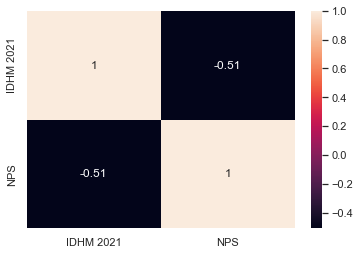

In [432]:
# correlação entre NPS e IDHM - mapa de calor
sns.heatmap(df_merge.corr(), annot=True)

# salvar em pdf 
plt.savefig('plots/nps_idh.pdf')